In [18]:
# Created by: Michael Cullen
# 08/10/2024

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from sklearn.metrics import r2_score
import numpy as np

In [20]:
df = pd.read_csv('Average-prices-2024-06.csv', header=0)  # Header=0 to use the first row as column names

df.head()

,Date,Region_Name,Area_Code,Average_Price,Monthly_Change,Annual_Change,Average_Price_SA
0,1968-04-01,Northern Ireland,N92000001,3661.485500,0.0,NaN,NaN
1,1968-04-01,England,E92000001,3408.108064,0.0,NaN,NaN
2,1968-04-01,Wales,W92000004,2885.414162,0.0,NaN,NaN
3,1968-04-01,Scotland,S92000003,2844.980688,0.0,NaN,NaN
4,1968-04-01,London,E12000007,4418.489911,0.0,NaN,NaN


In [21]:
area_set = {i for i in df['Region_Name']}


dropdown = widgets.Dropdown(
    options=sorted(area_set),
    description='Area:',
    disabled=False,
)

# below code created by chatgbt

# Define a function to filter the DataFrame based on dropdown selection
def filter_data(change):
    global area_of_interest
    global df_area  # Define df_area as a global variable
    area_of_interest = change['new']
    if area_of_interest:  # If a selection is made
        df_area = df[df['Region_Name'] == area_of_interest]
        display(df_area)

# Observe dropdown changes
dropdown.observe(filter_data, names='value')

# above code created by chatgbt

display(dropdown)

Dropdown(description='Area:', options=('Aberdeenshire', 'Adur', 'Amber Valley', 'Angus', 'Antrim and Newtownab…

,Date,Region_Name,Area_Code,Average_Price,Monthly_Change,Annual_Change,Average_Price_SA,Years
4,1968-04-01,London,E12000007,4418.489911,0.000000,NaN,NaN,1968
16,1968-05-01,London,E12000007,4418.489911,0.000000,NaN,NaN,1968
24,1968-06-01,London,E12000007,4418.489911,0.000000,NaN,NaN,1968
34,1968-07-01,London,E12000007,4544.732480,2.857143,NaN,NaN,1968
45,1968-08-01,London,E12000007,4544.732480,2.857143,NaN,NaN,1968
...,...,...,...,...,...,...,...,...
139807,2024-02-01,London,E12000007,509620.000000,-0.400000,-3.4,510998.0,2024
140203,2024-03-01,London,E12000007,509518.000000,0.000000,-1.5,510359.0,2024
140588,2024-04-01,London,E12000007,504048.000000,-1.100000,-3.5,507857.0,2024
141024,2024-05-01,London,E12000007,517017.000000,2.600000,-1.0,521481.0,2024


C:\Users\mjcul\AppData\Local\Temp\ipykernel_3632\1478049061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Date'] = pd.to_datetime(df_area['Date'], errors='coerce')
C:\Users\mjcul\AppData\Local\Temp\ipykernel_3632\1478049061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Years'] = df_area['Date'].dt.year


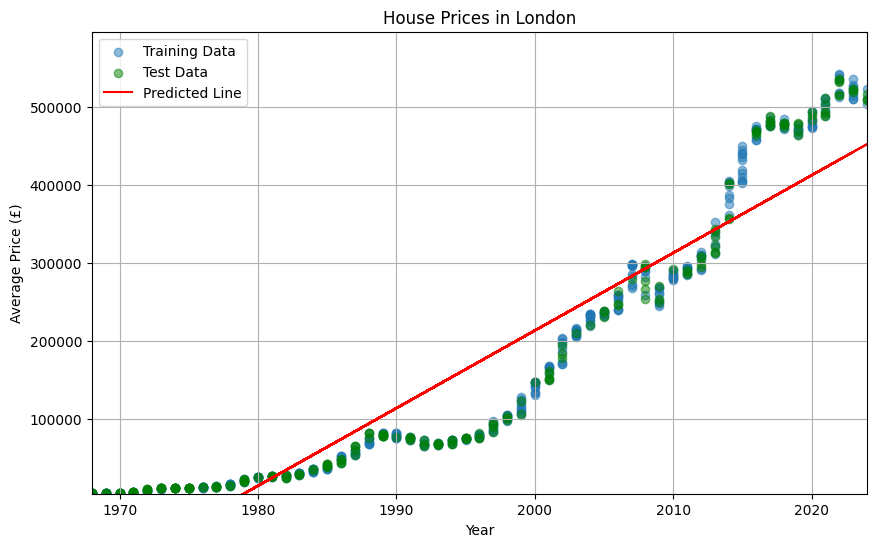

In [27]:
if 'df_area' not in globals() or df_area.empty:
    print(f"No data found for region: {area_of_interest}")
else:
    # Work with the filtered DataFrame `df_area`
    df_area['Date'] = pd.to_datetime(df_area['Date'], errors='coerce')
    df_area['Years'] = df_area['Date'].dt.year

    # Define features (X) and target variable (y)
    X = df_area[['Years']]
    y = df_area['Average_Price']

    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, label="Training Data")
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label="Test Data")
    plt.plot(X_test, y_pred, color='red', label="Predicted Line")
    
    plt.xlabel('Year')
    plt.ylabel('Average Price (£)')
    plt.title(f'House Prices in {area_of_interest}')
    plt.xlim(df_area['Years'].min(), df_area['Years'].max())
    plt.ylim(df_area['Average_Price'].min() * 0.9, df_area['Average_Price'].max() * 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

# Display model parameters
print("Model slope:    ", model.coef_[0])

Mean Squared Error: 3793573199.04
R² Score: 0.88
Model slope:     9957.15671499438
